In [14]:
import sys
sys.path.insert(0,'./src/')
from curve import *
from utils import *
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
from pipe import *
import pickle

In [15]:
l1 = pt(-10,0)
l2 = pt(4,-3)
l3 = pt(4,3)
ls = np.array([l1,l2,l3])
rs = np.array([1,1,1])
pipe1 = NLets(ls,rs)
shift1 = np.array([0,0])

# pipe1.build_geometry()
# pipe1.n_pts

In [16]:
ls2 = np.array([pt(5,0),-l2])
rs2 = np.array([1,1])
pipe2 = NLets(ls2,rs2)
shift2 = 2*l2

ls3 = np.array([-l3,pt(5,0)])
rs3 = np.array([1,1])
pipe3 = NLets(ls3,rs3)
shift3 = 2*l3

In [17]:
shift4 = shift2 + pt(10,0)
pipe4  = NLets(np.array([pt(-5,0), pt(4,3)]), np.array([1,1]))

shift5 = shift3 + pt(10,0)
pipe5  = NLets(np.array([pt(-5,0), pt(4,-3)]), np.array([1,1]))

In [18]:
pipe6 = NLets(np.array([[-4,-3],[10,0],[-4,3]]), np.array([1,1,1]))
shift6 = np.array([26,0])

In [19]:
for p in [pipe1, pipe2, pipe3, pipe4, pipe5, pipe6]:
    p.build_geometry()

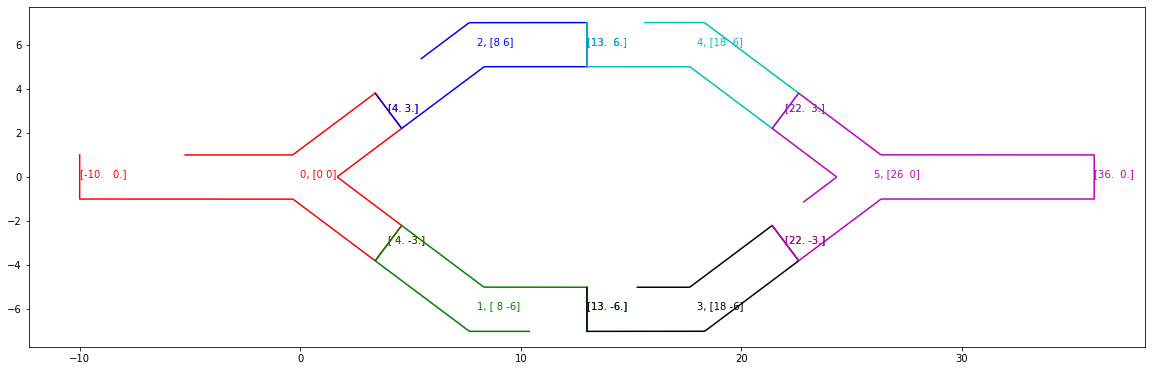

In [24]:
fig,ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

for a, i, j, c in zip(
    range(10), 
    [pipe1, pipe2, pipe3, pipe4, pipe5, pipe6],
    [shift1,shift2,shift3,shift4,shift5,shift6],
    'rgbkcm'):
    ax.plot(*(i.boundary + j).T,c=c)
    for k in i.lets:
        ax.text(*(k.matching_pt + j),f'{k.matching_pt + j}',c=c)
    ax.text(*j,f'{a}, {j}',c=c)

In [96]:
with open('dev_Pipes.pickle','wb') as f:
    pickle.dump([
        [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6],
        [shift1,shift2,shift3,shift4,shift5,shift6]],
                f,fix_imports=True,protocol=None)